In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsw-features/UNSW_NB15_features.csv
/kaggle/input/unsw-dataset/UNSW-NB15_1.csv
/kaggle/input/unsw-dataset/UNSW-NB15_4.csv
/kaggle/input/unsw-dataset/UNSW-NB15_3.csv
/kaggle/input/unsw-dataset/UNSW-NB15_2.csv


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


import ipaddress
import hashlib
from sklearn.cluster import KMeans
from numpy.random import laplace


In [99]:
import pandas as pd

# Load all datasets
data_df1 = pd.read_csv('/kaggle/input/unsw-dataset/UNSW-NB15_1.csv', header=None)
data_df2 = pd.read_csv('/kaggle/input/unsw-dataset/UNSW-NB15_2.csv', header=None)
data_df3 = pd.read_csv('/kaggle/input/unsw-dataset/UNSW-NB15_3.csv', header=None)
data_df4 = pd.read_csv('/kaggle/input/unsw-dataset/UNSW-NB15_4.csv', header=None)

# Filter for label == 1 in all datasets
label_1_df = pd.concat([
    data_df1[data_df1.iloc[:, -1] == 1],
    data_df2[data_df2.iloc[:, -1] == 1],
    data_df3[data_df3.iloc[:, -1] == 1],
    data_df4[data_df4.iloc[:, -1] == 1]
])

# Filter for label == 0 only in the first dataset
label_0_df = data_df1[data_df1.iloc[:, -1] == 0]

# Concatenate the filtered datasets
data_df = pd.concat([label_1_df, label_0_df], ignore_index=True)

# Display the final dataframe
data_df.head()



/tmp/ipykernel_30/129877545.py:4: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df1 = pd.read_csv('/kaggle/input/unsw-dataset/UNSW-NB15_1.csv', header=None)
/tmp/ipykernel_30/129877545.py:5: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df2 = pd.read_csv('/kaggle/input/unsw-dataset/UNSW-NB15_2.csv', header=None)


,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,175.45.176.3,21223,149.171.126.18,32780,udp,INT,0.000021,728,0,254,...,0,1,1,1,1,1,1,1,Exploits,1
1,175.45.176.2,23357,149.171.126.16,80,tcp,FIN,0.240139,918,25552,62,...,0,3,2,2,1,1,1,1,Exploits,1
2,175.45.176.0,13284,149.171.126.16,80,tcp,FIN,2.390390,1362,268,254,...,0,5,2,2,1,1,1,1,Reconnaissance,1
3,175.45.176.2,13792,149.171.126.16,5555,tcp,FIN,0.175190,8168,268,254,...,0,1,1,1,1,1,1,1,Exploits,1
4,175.45.176.2,26939,149.171.126.10,80,tcp,FIN,0.190600,844,268,254,...,0,3,1,1,1,1,1,1,Exploits,1


In [100]:
# data_df = pd.read_csv('/kaggle/input/unsw-dataset/UNSW-NB15_1.csv', header = None)
# import pandas as pd


columns_df = pd.read_csv('/kaggle/input/unsw-features/UNSW_NB15_features.csv')
columns_df['Name'] = columns_df['Name'].str.lower()

column_names = columns_df['Name'].tolist()

data_df.columns = column_names
data_df.head()


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,175.45.176.3,21223,149.171.126.18,32780,udp,INT,0.000021,728,0,254,...,0,1,1,1,1,1,1,1,Exploits,1
1,175.45.176.2,23357,149.171.126.16,80,tcp,FIN,0.240139,918,25552,62,...,0,3,2,2,1,1,1,1,Exploits,1
2,175.45.176.0,13284,149.171.126.16,80,tcp,FIN,2.390390,1362,268,254,...,0,5,2,2,1,1,1,1,Reconnaissance,1
3,175.45.176.2,13792,149.171.126.16,5555,tcp,FIN,0.175190,8168,268,254,...,0,1,1,1,1,1,1,1,Exploits,1
4,175.45.176.2,26939,149.171.126.10,80,tcp,FIN,0.190600,844,268,254,...,0,3,1,1,1,1,1,1,Exploits,1


In [101]:
data_df = data_df

In [102]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999069 entries, 0 to 999068
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             999069 non-null  object 
 1   sport             999069 non-null  object 
 2   dstip             999069 non-null  object 
 3   dsport            999069 non-null  object 
 4   proto             999069 non-null  object 
 5   state             999069 non-null  object 
 6   dur               999069 non-null  float64
 7   sbytes            999069 non-null  int64  
 8   dbytes            999069 non-null  int64  
 9   sttl              999069 non-null  int64  
 10  dttl              999069 non-null  int64  
 11  sloss             999069 non-null  int64  
 12  dloss             999069 non-null  int64  
 13  service           999069 non-null  object 
 14  sload             999069 non-null  float64
 15  dload             999069 non-null  float64
 16  spkts             99

In [103]:
data_df.drop(columns = 'attack_cat', inplace = True)

In [104]:
data_df

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
0,175.45.176.3,21223,149.171.126.18,32780,udp,INT,0.000021,728,0,254,...,0.0,0,1,1,1,1,1,1,1,1
1,175.45.176.2,23357,149.171.126.16,80,tcp,FIN,0.240139,918,25552,62,...,0.0,0,3,2,2,1,1,1,1,1
2,175.45.176.0,13284,149.171.126.16,80,tcp,FIN,2.390390,1362,268,254,...,0.0,0,5,2,2,1,1,1,1,1
3,175.45.176.2,13792,149.171.126.16,5555,tcp,FIN,0.175190,8168,268,254,...,0.0,0,1,1,1,1,1,1,1,1
4,175.45.176.2,26939,149.171.126.10,80,tcp,FIN,0.190600,844,268,254,...,0.0,0,3,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999064,59.166.0.8,12520,149.171.126.6,31010,tcp,FIN,0.020383,320,1874,31,...,0.0,0,8,20,7,5,1,1,4,0
999065,59.166.0.0,18895,149.171.126.9,80,tcp,FIN,1.402957,19410,1087890,31,...,0.0,0,1,1,2,7,2,2,2,0
999066,59.166.0.0,30103,149.171.126.5,5190,tcp,FIN,0.007108,2158,2464,31,...,0.0,0,13,13,6,7,2,1,2,0
999067,59.166.0.6,30388,149.171.126.5,111,udp,CON,0.004435,568,304,31,...,0.0,0,10,13,6,5,1,1,3,0


In [105]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999069 entries, 0 to 999068
Data columns (total 48 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             999069 non-null  object 
 1   sport             999069 non-null  object 
 2   dstip             999069 non-null  object 
 3   dsport            999069 non-null  object 
 4   proto             999069 non-null  object 
 5   state             999069 non-null  object 
 6   dur               999069 non-null  float64
 7   sbytes            999069 non-null  int64  
 8   dbytes            999069 non-null  int64  
 9   sttl              999069 non-null  int64  
 10  dttl              999069 non-null  int64  
 11  sloss             999069 non-null  int64  
 12  dloss             999069 non-null  int64  
 13  service           999069 non-null  object 
 14  sload             999069 non-null  float64
 15  dload             999069 non-null  float64
 16  spkts             99

In [106]:
features = pd.read_csv('/kaggle/input/unsw-features/UNSW_NB15_features.csv')
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [107]:
features['Type '] = features['Type '].str.lower()

In [108]:
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [109]:
cols = data_df.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [110]:

error_count = 0


for c in integer_names:
    try:
        
        data_df[c] = pd.to_numeric(data_df[c], errors='coerce')
        
       
        error_count += data_df[c].isna().sum()
    except Exception as e:
        print(f"Error processing column {c}: {e}")


print(f"Total number of rows with invalid numeric values: {error_count}")


Total number of rows with invalid numeric values: 580193


In [111]:

error_count = 0


for c in binary_names:
    try:
        
        data_df[c] = pd.to_numeric(data_df[c], errors='coerce')
        
   
        error_count += data_df[c].isna().sum()
    except Exception as e:
        print(f"Error processing column {c}: {e}")


print(f"Total number of rows with invalid numeric values: {error_count}")


Total number of rows with invalid numeric values: 297183


In [112]:
error_count = 0


for c in float_names:
    try:
      
        data_df[c] = pd.to_numeric(data_df[c], errors='coerce')
        
     
        error_count += data_df[c].isna().sum()
    except Exception as e:
        print(f"Error processing column {c}: {e}")


print(f"Total number of rows with invalid numeric values: {error_count}")


Total number of rows with invalid numeric values: 0


In [113]:
def ip_to_int(ip):
    return int(ipaddress.IPv4Address(ip))

data_df['src_ip_numeric'] = data_df['srcip'].apply(ip_to_int)
data_df['dst_ip_numeric'] = data_df['dstip'].apply(ip_to_int)


In [114]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999069 entries, 0 to 999068
Data columns (total 50 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             999069 non-null  object 
 1   sport             999061 non-null  float64
 2   dstip             999069 non-null  object 
 3   dsport            999006 non-null  float64
 4   proto             999069 non-null  object 
 5   state             999069 non-null  object 
 6   dur               999069 non-null  float64
 7   sbytes            999069 non-null  int64  
 8   dbytes            999069 non-null  int64  
 9   sttl              999069 non-null  int64  
 10  dttl              999069 non-null  int64  
 11  sloss             999069 non-null  int64  
 12  dloss             999069 non-null  int64  
 13  service           999069 non-null  object 
 14  sload             999069 non-null  float64
 15  dload             999069 non-null  float64
 16  spkts             99

In [115]:
data_df.drop(columns = ['sport','dsport','ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd'],inplace = True)

In [116]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999069 entries, 0 to 999068
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             999069 non-null  object 
 1   dstip             999069 non-null  object 
 2   proto             999069 non-null  object 
 3   state             999069 non-null  object 
 4   dur               999069 non-null  float64
 5   sbytes            999069 non-null  int64  
 6   dbytes            999069 non-null  int64  
 7   sttl              999069 non-null  int64  
 8   dttl              999069 non-null  int64  
 9   sloss             999069 non-null  int64  
 10  dloss             999069 non-null  int64  
 11  service           999069 non-null  object 
 12  sload             999069 non-null  float64
 13  dload             999069 non-null  float64
 14  spkts             999069 non-null  int64  
 15  dpkts             999069 non-null  int64  
 16  swin              99

In [117]:
print(data_df['label'].value_counts())

label
0    677786
1    321283
Name: count, dtype: int64


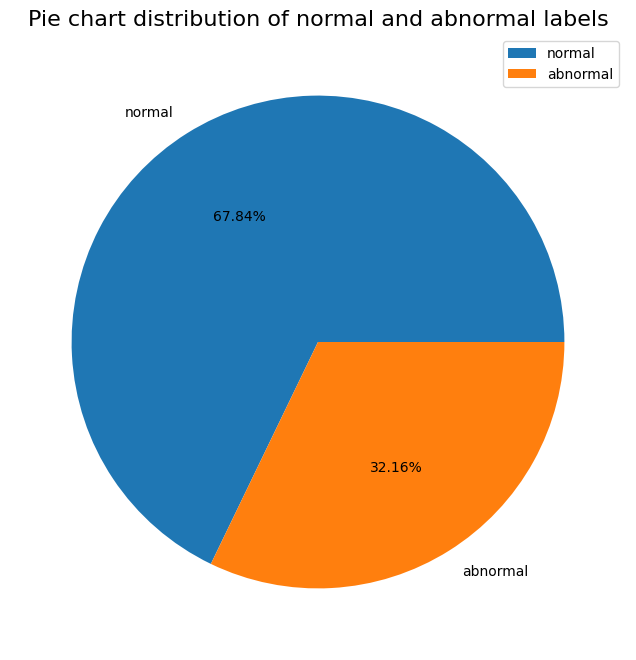

In [118]:

plt.figure(figsize=(8,8))
plt.pie(data_df.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.show()

In [119]:
data_df

,srcip,dstip,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label,src_ip_numeric,dst_ip_numeric
0,175.45.176.3,149.171.126.18,udp,INT,0.000021,728,0,254,0,0,...,1,1,1,1,1,1,1,1,2939006979,2511044114
1,175.45.176.2,149.171.126.16,tcp,FIN,0.240139,918,25552,62,252,2,...,3,2,2,1,1,1,1,1,2939006978,2511044112
2,175.45.176.0,149.171.126.16,tcp,FIN,2.390390,1362,268,254,252,6,...,5,2,2,1,1,1,1,1,2939006976,2511044112
3,175.45.176.2,149.171.126.16,tcp,FIN,0.175190,8168,268,254,252,4,...,1,1,1,1,1,1,1,1,2939006978,2511044112
4,175.45.176.2,149.171.126.10,tcp,FIN,0.190600,844,268,254,252,2,...,3,1,1,1,1,1,1,1,2939006978,2511044106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999064,59.166.0.8,149.171.126.6,tcp,FIN,0.020383,320,1874,31,29,1,...,8,20,7,5,1,1,4,0,1000734728,2511044102
999065,59.166.0.0,149.171.126.9,tcp,FIN,1.402957,19410,1087890,31,29,2,...,1,1,2,7,2,2,2,0,1000734720,2511044105
999066,59.166.0.0,149.171.126.5,tcp,FIN,0.007108,2158,2464,31,29,6,...,13,13,6,7,2,1,2,0,1000734720,2511044101
999067,59.166.0.6,149.171.126.5,udp,CON,0.004435,568,304,31,29,0,...,10,13,6,5,1,1,3,0,1000734726,2511044101


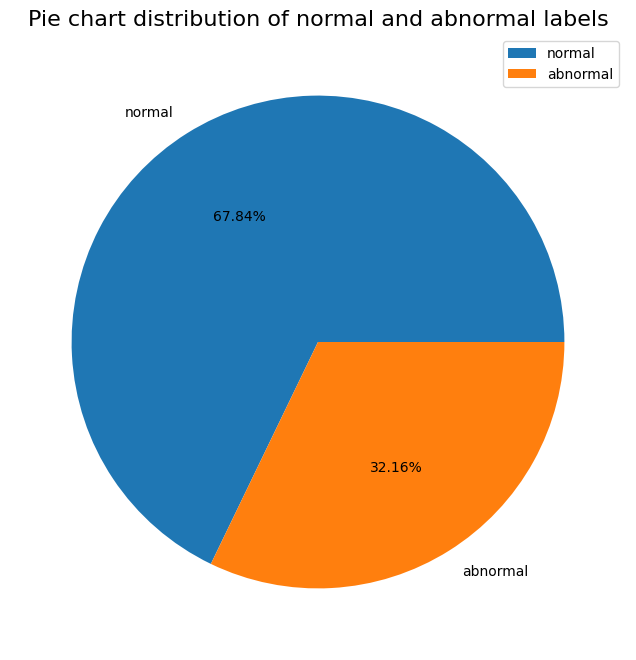

In [120]:

plt.figure(figsize=(8,8))
plt.pie(data_df.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.show()

In [121]:
num_col = list(data_df.select_dtypes(include='number').columns)
# num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'src_ip_numeric', 'dst_ip_numeric']


In [122]:
# data_df['stime'] = data_df['stime'].apply(lambda x: "{:.0f}".format(x))

In [123]:
# data_df['stime'].value_counts()

In [124]:

# # using minmax scaler for normalizing data
# minmax_scale = MinMaxScaler(feature_range=(0, 1))
# def normalization(df,col):
#   for i in col:
#     arr = df[i]
#     arr = np.array(arr)
#     df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
#   return df

In [125]:
data_df.head()

,srcip,dstip,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label,src_ip_numeric,dst_ip_numeric
0,175.45.176.3,149.171.126.18,udp,INT,0.000021,728,0,254,0,0,...,1,1,1,1,1,1,1,1,2939006979,2511044114
1,175.45.176.2,149.171.126.16,tcp,FIN,0.240139,918,25552,62,252,2,...,3,2,2,1,1,1,1,1,2939006978,2511044112
2,175.45.176.0,149.171.126.16,tcp,FIN,2.390390,1362,268,254,252,6,...,5,2,2,1,1,1,1,1,2939006976,2511044112
3,175.45.176.2,149.171.126.16,tcp,FIN,0.175190,8168,268,254,252,4,...,1,1,1,1,1,1,1,1,2939006978,2511044112
4,175.45.176.2,149.171.126.10,tcp,FIN,0.190600,844,268,254,252,2,...,3,1,1,1,1,1,1,1,2939006978,2511044106


In [126]:
# # calling normalization() function
# data_df = normalization(data_df.copy(),num_col)

In [127]:
data_df.head()

,srcip,dstip,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,...,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label,src_ip_numeric,dst_ip_numeric
0,175.45.176.3,149.171.126.18,udp,INT,0.000021,728,0,254,0,0,...,1,1,1,1,1,1,1,1,2939006979,2511044114
1,175.45.176.2,149.171.126.16,tcp,FIN,0.240139,918,25552,62,252,2,...,3,2,2,1,1,1,1,1,2939006978,2511044112
2,175.45.176.0,149.171.126.16,tcp,FIN,2.390390,1362,268,254,252,6,...,5,2,2,1,1,1,1,1,2939006976,2511044112
3,175.45.176.2,149.171.126.16,tcp,FIN,0.175190,8168,268,254,252,4,...,1,1,1,1,1,1,1,1,2939006978,2511044112
4,175.45.176.2,149.171.126.10,tcp,FIN,0.190600,844,268,254,252,2,...,3,1,1,1,1,1,1,1,2939006978,2511044106


In [128]:
num_col.append('label')

In [129]:
bin_label = pd.DataFrame(data_df.label.map(lambda x:'normal' if x==0 else 'abnormal'))
bin_data = data_df.copy()
bin_data['label'] = bin_label
     

In [130]:
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [131]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

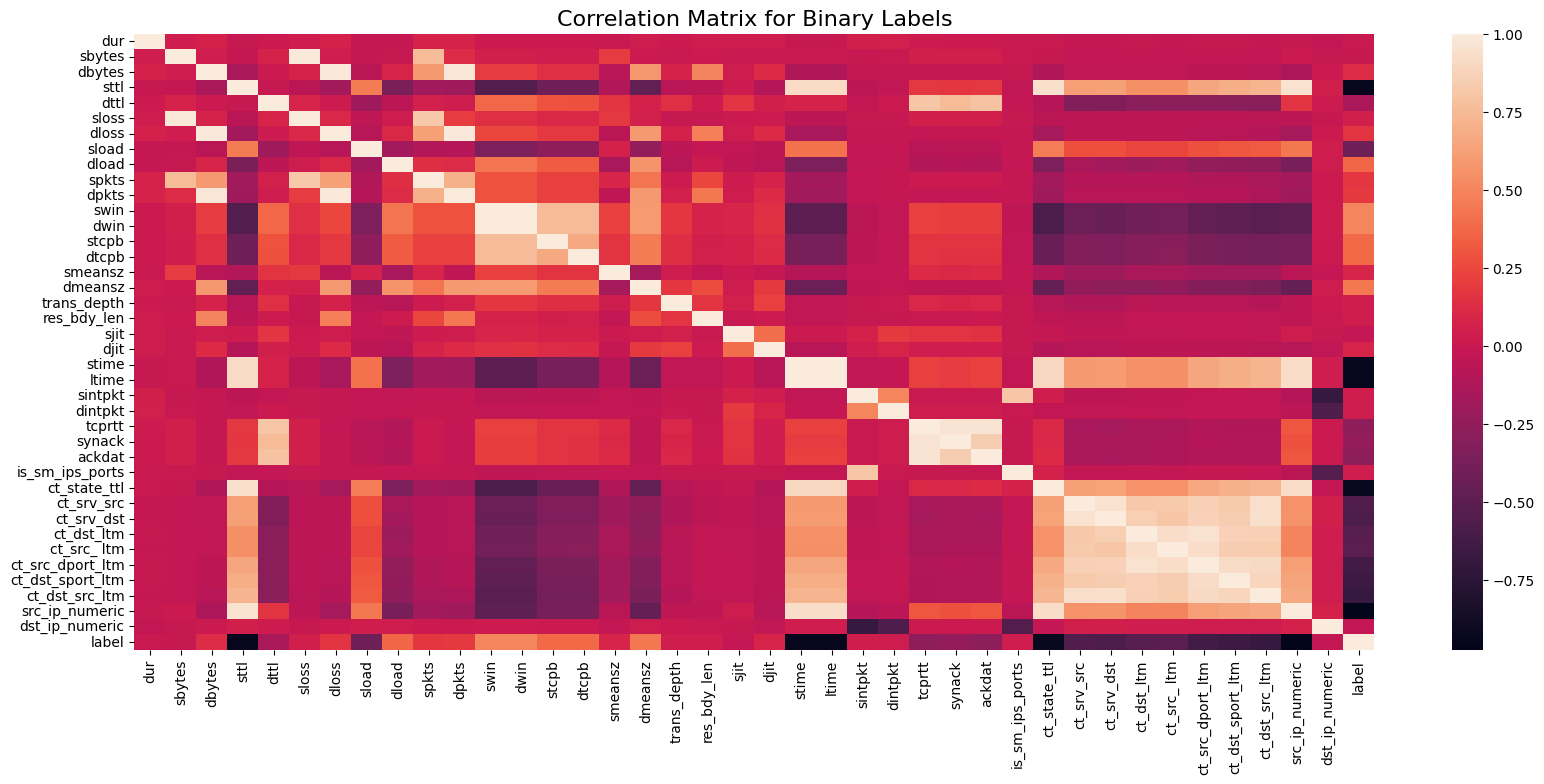

In [132]:
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.show()

In [133]:
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
highest_corr_bin.sort_values(ascending=True)

dload               0.360791
stcpb               0.379982
dtcpb               0.380295
sload               0.424631
dmeansz             0.443474
dwin                0.500450
swin                0.501522
ct_src_ ltm         0.508745
ct_dst_ltm          0.511710
ct_srv_src          0.563857
ct_srv_dst          0.573594
ct_src_dport_ltm    0.620878
ct_dst_sport_ltm    0.660275
ct_dst_src_ltm      0.684330
ct_state_ttl        0.931165
ltime               0.948891
stime               0.948891
sttl                0.949574
src_ip_numeric      0.974117
label               1.000000
Name: label, dtype: float64

In [134]:
bin_cols = highest_corr_bin.index
bin_cols
     

Index(['sttl', 'sload', 'dload', 'swin', 'dwin', 'stcpb', 'dtcpb', 'dmeansz',
       'stime', 'ltime', 'ct_state_ttl', 'ct_srv_src', 'ct_srv_dst',
       'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'src_ip_numeric', 'label'],
      dtype='object')

In [135]:
bin_data = bin_data[bin_cols].copy()
# bin_data.drop(columns = ['sttl', 'dttl','stime', 'ltime'],inplace = True)

In [136]:
# bin_data.drop(columns = ['ct_state_ttl'],inplace = True)

In [41]:
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

In [42]:
X

,sttl,sload,dload,swin,dwin,stcpb,dtcpb,dmeansz,stime,ltime,ct_state_ttl,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,src_ip_numeric
0,254,1.386667e+08,0.000000e+00,0,0,0,0,0,1421927415,1421927415,2,1,1,1,1,1,1,1,2939006979
1,62,2.805042e+04,8.157942e+05,255,255,1708297952,1939490744,1065,1421927416,1421927416,1,3,2,2,1,1,1,1,2939006978
2,254,4.233619e+03,7.496685e+02,255,255,3897219059,2466816006,45,1421927414,1421927416,1,5,2,2,1,1,1,1,2939006976
3,254,3.463668e+05,1.022889e+04,255,255,2505143795,3592239707,45,1421927417,1421927417,1,1,1,1,1,1,1,1,2939006978
4,254,3.189927e+04,9.401889e+03,255,255,3006332195,1452987536,45,1421927418,1421927418,1,3,1,1,1,1,1,1,2939006978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999064,31,1.047932e+05,6.436736e+05,255,255,3208686479,3225486168,234,1421955842,1421955842,0,8,20,7,5,1,1,4,1000734728
999065,31,1.103783e+05,6.195098e+06,255,255,283296697,2429736754,1458,1421955841,1421955842,0,1,1,2,7,2,2,2,1000734720
999066,31,2.328644e+06,2.658413e+06,255,255,703293844,2848960529,103,1421955842,1421955842,0,13,13,6,7,2,1,2,1000734720
999067,31,7.684329e+05,4.112740e+05,0,0,0,0,76,1421955842,1421955842,0,10,13,6,5,1,1,3,1000734726


In [43]:

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

In [44]:
knn_bin=KNeighborsClassifier(n_neighbors=5)
knn_bin.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:

y_pred = knn_bin.predict(X_test)

In [46]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)
     

Mean Absolute Error -  0.004724393686128099
Mean Squared Error -  0.004724393686128099
Root Mean Squared Error -  0.06873422499838126
R2 Score -  97.8372349040755
Accuracy -  99.52756063138719


In [47]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.99      1.00      0.99     64017
      normal       1.00      0.99      1.00    135797

    accuracy                           1.00    199814
   macro avg       0.99      1.00      0.99    199814
weighted avg       1.00      1.00      1.00    199814



In [137]:
data_df[['spkts','stime', 'ltime', 'dur']]

,spkts,stime,ltime,dur
0,2,1421927415,1421927415,0.000021
1,12,1421927416,1421927416,0.240139
2,14,1421927414,1421927416,2.390390
3,14,1421927417,1421927417,0.175190
4,10,1421927418,1421927418,0.190600
...,...,...,...,...
999064,6,1421955842,1421955842,0.020383
999065,364,1421955841,1421955842,1.402957
999066,24,1421955842,1421955842,0.007108
999067,4,1421955842,1421955842,0.004435


In [138]:
data_df['stime']

0         1421927415
1         1421927416
2         1421927414
3         1421927417
4         1421927418
             ...    
999064    1421955842
999065    1421955841
999066    1421955842
999067    1421955842
999068    1421955842
Name: stime, Length: 999069, dtype: int64

In [139]:
data_df['spkts'].value_counts()

spkts
2       390843
4        57835
14       50037
52       45602
12       39782
         ...  
2712         1
1142         1
1072         1
2446         1
469          1
Name: count, Length: 917, dtype: int64

In [142]:
from sklearn.cluster import KMeans
from numpy.random import laplace
import numpy as np


K_features = 100
epsilon = 1.0   


feature_cols = ['spkts', 'stime', 'ltime', 'dur']
kmeans_features = KMeans(n_clusters=K_features, random_state=42)
data_df['feature_cluster'] = kmeans_features.fit_predict(data_df[feature_cols])


def apply_differential_privacy_means(df, features, epsilon):
    perturbed_means = {}
    for feature in features:
        perturbed_means[feature] = {}
        for cluster_id in df['feature_cluster'].unique():
            cluster_data = df[df['feature_cluster'] == cluster_id][feature]
            mean = cluster_data.mean()
            noise = laplace(0, 1 / epsilon)  # Laplace noise
            perturbed_means[feature][cluster_id] = mean + noise
            
    return perturbed_means

perturbed_means = apply_differential_privacy_means(data_df, feature_cols, epsilon)



for feature in feature_cols:
    for cluster_id, perturbed_mean in perturbed_means[feature].items():
        data_df.loc[data_df['feature_cluster'] == cluster_id, feature] = perturbed_mean



print(data_df[['stime', 'ltime', 'dur']])


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_30/2421901524.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '34.63783865557506' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_df.loc[data_df['feature_cluster'] == cluster_id, feature] = perturbed_mean


               stime         ltime       dur
0       1.421928e+09  1.421928e+09  2.993826
1       1.421928e+09  1.421928e+09  2.993826
2       1.421928e+09  1.421928e+09  2.993826
3       1.421928e+09  1.421928e+09  2.993826
4       1.421928e+09  1.421928e+09  2.993826
...              ...           ...       ...
999064  1.421956e+09  1.421956e+09 -0.965670
999065  1.421956e+09  1.421956e+09 -0.965670
999066  1.421956e+09  1.421956e+09 -0.965670
999067  1.421956e+09  1.421956e+09 -0.965670
999068  1.421956e+09  1.421956e+09 -0.965670

[999069 rows x 3 columns]


In [146]:
data_df['spkts'].value_counts()

spkts
81.986622    32556
53.927177    26199
52.986262    25952
27.034063    19151
36.268354    17115
             ...  
21.065616     1774
18.818854     1597
21.910642     1566
23.594220     1328
21.968637     1120
Name: count, Length: 100, dtype: int64

In [ ]:
data_df['spkts'].value_counts()

In [51]:
data_df = data_df.drop('feature_cluster', axis = 1)



In [52]:
# Specify the two columns you want at the start
cols_to_move = ['src_ip_numeric', 'dst_ip_numeric']

# Get the remaining columns
remaining_cols = [col for col in data_df.columns if col not in cols_to_move]

# Reorder the DataFrame
data_df = data_df[cols_to_move + remaining_cols]

In [53]:
data_df

,src_ip_numeric,dst_ip_numeric,srcip,dstip,proto,state,dur,sbytes,dbytes,sttl,...,is_sm_ips_ports,ct_state_ttl,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
0,2939006979,2511044114,175.45.176.3,149.171.126.18,udp,INT,1.596457,728,0,254,...,0,2,1,1,1,1,1,1,1,1
1,2939006978,2511044112,175.45.176.2,149.171.126.16,tcp,FIN,1.596457,918,25552,62,...,0,1,3,2,2,1,1,1,1,1
2,2939006976,2511044112,175.45.176.0,149.171.126.16,tcp,FIN,1.596457,1362,268,254,...,0,1,5,2,2,1,1,1,1,1
3,2939006978,2511044112,175.45.176.2,149.171.126.16,tcp,FIN,1.596457,8168,268,254,...,0,1,1,1,1,1,1,1,1,1
4,2939006978,2511044106,175.45.176.2,149.171.126.10,tcp,FIN,1.596457,844,268,254,...,0,1,3,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999064,1000734728,2511044102,59.166.0.8,149.171.126.6,tcp,FIN,-0.070793,320,1874,31,...,0,0,8,20,7,5,1,1,4,0
999065,1000734720,2511044105,59.166.0.0,149.171.126.9,tcp,FIN,-0.070793,19410,1087890,31,...,0,0,1,1,2,7,2,2,2,0
999066,1000734720,2511044101,59.166.0.0,149.171.126.5,tcp,FIN,-0.070793,2158,2464,31,...,0,0,13,13,6,7,2,1,2,0
999067,1000734726,2511044101,59.166.0.6,149.171.126.5,udp,CON,-0.070793,568,304,31,...,0,0,10,13,6,5,1,1,3,0


In [54]:
data_df['stime']

0         1.421928e+09
1         1.421928e+09
2         1.421928e+09
3         1.421928e+09
4         1.421928e+09
              ...     
999064    1.421956e+09
999065    1.421956e+09
999066    1.421956e+09
999067    1.421956e+09
999068    1.421956e+09
Name: stime, Length: 999069, dtype: float64

In [55]:
 data_df['stime'] = data_df['stime'].apply(lambda x: "{:.0f}".format(x))
 data_df['ltime'] = data_df['ltime'].apply(lambda x: "{:.0f}".format(x))
 data_df['dur'] = data_df['dur'].apply(lambda x: "{:.0f}".format(x))

In [56]:
print(data_df[['stime', 'ltime', 'dur']])

             stime       ltime dur
0       1421927663  1421927665   2
1       1421927663  1421927665   2
2       1421927663  1421927665   2
3       1421927663  1421927665   2
4       1421927663  1421927665   2
...            ...         ...  ..
999064  1421955576  1421955580  -0
999065  1421955576  1421955580  -0
999066  1421955576  1421955580  -0
999067  1421955576  1421955580  -0
999068  1421955576  1421955580  -0

[999069 rows x 3 columns]


In [57]:
data_df['stime'] = pd.to_numeric(data_df['stime'], errors='coerce')
data_df['ltime'] = pd.to_numeric(data_df['ltime'], errors='coerce')
data_df['dur'] = pd.to_numeric(data_df['dur'], errors='coerce')

In [58]:
num_col = list(data_df.select_dtypes(include='number').columns)
# num_col.remove('id')
num_col.remove('label')
print(num_col)

['src_ip_numeric', 'dst_ip_numeric', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']


In [59]:
num_col.append('label')

In [60]:
bin_label = pd.DataFrame(data_df.label.map(lambda x:'normal' if x==0 else 'abnormal'))
bin_data = data_df.copy()
bin_data['label'] = bin_label
     

In [61]:
bin_data

,src_ip_numeric,dst_ip_numeric,srcip,dstip,proto,state,dur,sbytes,dbytes,sttl,...,is_sm_ips_ports,ct_state_ttl,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
0,2939006979,2511044114,175.45.176.3,149.171.126.18,udp,INT,2,728,0,254,...,0,2,1,1,1,1,1,1,1,abnormal
1,2939006978,2511044112,175.45.176.2,149.171.126.16,tcp,FIN,2,918,25552,62,...,0,1,3,2,2,1,1,1,1,abnormal
2,2939006976,2511044112,175.45.176.0,149.171.126.16,tcp,FIN,2,1362,268,254,...,0,1,5,2,2,1,1,1,1,abnormal
3,2939006978,2511044112,175.45.176.2,149.171.126.16,tcp,FIN,2,8168,268,254,...,0,1,1,1,1,1,1,1,1,abnormal
4,2939006978,2511044106,175.45.176.2,149.171.126.10,tcp,FIN,2,844,268,254,...,0,1,3,1,1,1,1,1,1,abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999064,1000734728,2511044102,59.166.0.8,149.171.126.6,tcp,FIN,0,320,1874,31,...,0,0,8,20,7,5,1,1,4,normal
999065,1000734720,2511044105,59.166.0.0,149.171.126.9,tcp,FIN,0,19410,1087890,31,...,0,0,1,1,2,7,2,2,2,normal
999066,1000734720,2511044101,59.166.0.0,149.171.126.5,tcp,FIN,0,2158,2464,31,...,0,0,13,13,6,7,2,1,2,normal
999067,1000734726,2511044101,59.166.0.6,149.171.126.5,udp,CON,0,568,304,31,...,0,0,10,13,6,5,1,1,3,normal


In [62]:
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [63]:
bin_data
le1.classes_

array(['abnormal', 'normal'], dtype=object)

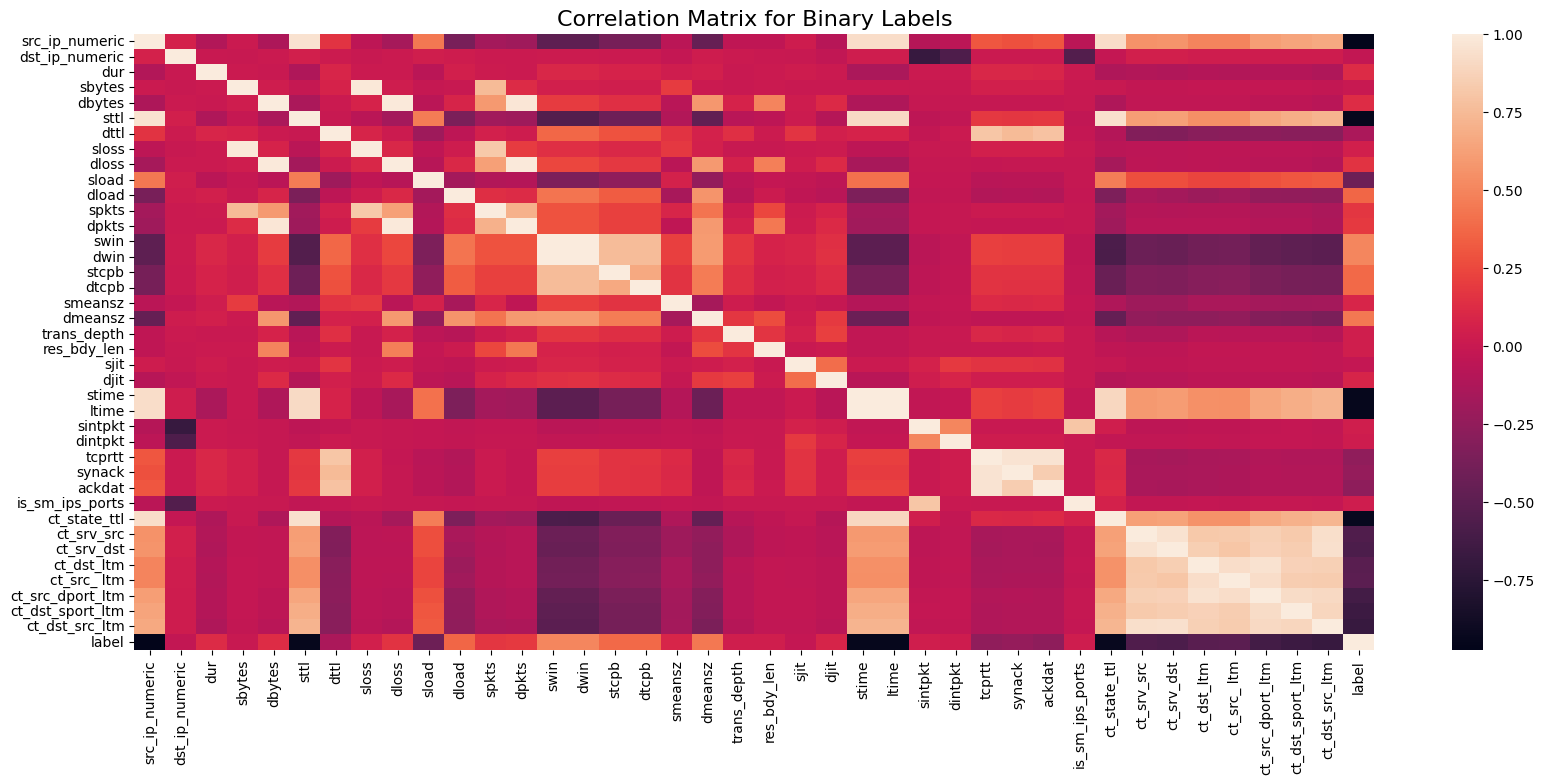

In [64]:
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.show()

In [65]:
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
highest_corr_bin.sort_values(ascending=True)

dload               0.360791
stcpb               0.379982
dtcpb               0.380295
sload               0.424631
dmeansz             0.443474
dwin                0.500450
swin                0.501522
ct_src_ ltm         0.508745
ct_dst_ltm          0.511710
ct_srv_src          0.563857
ct_srv_dst          0.573594
ct_src_dport_ltm    0.620878
ct_dst_sport_ltm    0.660275
ct_dst_src_ltm      0.684330
ct_state_ttl        0.931165
ltime               0.948891
stime               0.948891
sttl                0.949574
src_ip_numeric      0.974117
label               1.000000
Name: label, dtype: float64

In [66]:
bin_cols = highest_corr_bin.index
bin_cols

bin_data = bin_data[bin_cols].copy()
# bin_data.drop(columns = ['sttl', 'dttl','stime', 'ltime'],inplace = True)

# bin_data.drop(columns = ['ct_state_ttl'],inplace = True)

X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']



X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

knn_bin=KNeighborsClassifier(n_neighbors=5)
knn_bin.fit(X_train,y_train)



y_pred = knn_bin.predict(X_test)

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.004834496081355661
Mean Squared Error -  0.004834496081355661
Root Mean Squared Error -  0.06953054063759076
R2 Score -  97.78649008217542
Accuracy -  99.51655039186443


In [92]:
import pandas as pd
import numpy as np
import ipaddress
import hashlib
from sklearn.cluster import KMeans


n_bits = 16  
K = 20


def prefix_preserving_anonymization(ip_numeric, n_bits):
    ip_binary = format(ip_numeric, '032b')
    network_prefix = ip_binary[:n_bits]
    host_suffix = ip_binary[n_bits:]
    
    
    prefix_hash = hashlib.sha256(network_prefix.encode()).hexdigest()
    anonymized_network_prefix = bin(int(prefix_hash[:8], 16))[2:].zfill(n_bits)[:n_bits]
    
    anonymized_ip_binary = anonymized_network_prefix + host_suffix
    return int(anonymized_ip_binary, 2)

data_df['src_ip_anonymized'] = data_df['src_ip_numeric'].apply(lambda x: prefix_preserving_anonymization(x, n_bits))
data_df['dst_ip_anonymized'] = data_df['dst_ip_numeric'].apply(lambda x: prefix_preserving_anonymization(x, n_bits))

# data_df['src_ip_anonymized'] = data_df['src_ip_anonymized'].apply(lambda x: str(ipaddress.IPv4Address(x)))
# data_df['dst_ip_anonymized'] = data_df['dst_ip_anonymized'].apply(lambda x: str(ipaddress.IPv4Address(x)))
# print(data_df['src_ip_anonymized'])
# print(data_df['dst_ip_anonymized'])
data_df['src_ip_host'] = data_df['src_ip_anonymized'].apply(lambda x: x & (2**(32 - n_bits) - 1))
data_df['dst_ip_host'] = data_df['dst_ip_anonymized'].apply(lambda x: x & (2**(32 - n_bits) - 1))


kmeans_src = KMeans(n_clusters=K)
data_df['src_ip_cluster'] = kmeans_src.fit_predict(data_df[['src_ip_host']])

kmeans_dst = KMeans(n_clusters=K)
data_df['dst_ip_cluster'] = kmeans_dst.fit_predict(data_df[['dst_ip_host']])

def replace_with_cluster_mean(df, ip_host_column, cluster_column):
    cluster_means = df.groupby(cluster_column)[ip_host_column].transform('mean').astype(int)
    return cluster_means

data_df['src_ip_host'] = replace_with_cluster_mean(data_df, 'src_ip_host', 'src_ip_cluster')
data_df['dst_ip_host'] = replace_with_cluster_mean(data_df, 'dst_ip_host', 'dst_ip_cluster')


def combine_network_host(network_part, host_part, n_bits):
    anonymized_ip_binary = format(network_part, f'0{n_bits}b') + format(host_part, f'0{32 - n_bits}b')
    return int(anonymized_ip_binary, 2)

data_df['src_ip_numeric'] = data_df.apply(lambda row: combine_network_host(row['src_ip_anonymized'] >> (32 - n_bits), row['src_ip_host'], n_bits), axis=1)
data_df['dst_ip_numeric'] = data_df.apply(lambda row: combine_network_host(row['dst_ip_anonymized'] >> (32 - n_bits), row['dst_ip_host'], n_bits), axis=1)


data_df['src_ip_final'] = data_df['src_ip_numeric'].apply(lambda x: str(ipaddress.IPv4Address(x)))
data_df['dst_ip_final'] = data_df['dst_ip_numeric'].apply(lambda x: str(ipaddress.IPv4Address(x)))


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [93]:
data_df

,src_ip_numeric,dst_ip_numeric,srcip,dstip,proto,state,dur,sbytes,dbytes,sttl,...,ct_dst_src_ltm,label,src_ip_anonymized,dst_ip_anonymized,src_ip_host,dst_ip_host,src_ip_cluster,dst_ip_cluster,src_ip_final,dst_ip_final
0,2642259971,3923541521,175.45.176.3,149.171.126.18,udp,INT,2,728,0,254,...,1,1,2642259971,3923541521,45059,32273,8,8,157.125.176.3,233.220.126.17
1,2642259969,3923541518,175.45.176.2,149.171.126.16,tcp,FIN,2,918,25552,62,...,1,1,2642259969,3923541518,45057,32270,14,12,157.125.176.1,233.220.126.14
2,2642259968,3923541518,175.45.176.0,149.171.126.16,tcp,FIN,2,1362,268,254,...,1,1,2642259968,3923541518,45056,32270,1,12,157.125.176.0,233.220.126.14
3,2642259969,3923541518,175.45.176.2,149.171.126.16,tcp,FIN,2,8168,268,254,...,1,1,2642259969,3923541518,45057,32270,14,12,157.125.176.1,233.220.126.14
4,2642259969,3923541513,175.45.176.2,149.171.126.10,tcp,FIN,2,844,268,254,...,1,1,2642259969,3923541513,45057,32265,14,10,157.125.176.1,233.220.126.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999064,3367895048,3923541510,59.166.0.8,149.171.126.6,tcp,FIN,0,320,1874,31,...,4,0,3367895048,3923541510,8,32262,13,19,200.190.0.8,233.220.126.6
999065,3367895040,3923541513,59.166.0.0,149.171.126.9,tcp,FIN,0,19410,1087890,31,...,2,0,3367895040,3923541513,0,32265,12,10,200.190.0.0,233.220.126.9
999066,3367895040,3923541509,59.166.0.0,149.171.126.5,tcp,FIN,0,2158,2464,31,...,2,0,3367895040,3923541509,0,32261,12,17,200.190.0.0,233.220.126.5
999067,3367895046,3923541509,59.166.0.6,149.171.126.5,udp,CON,0,568,304,31,...,3,0,3367895046,3923541509,6,32261,18,17,200.190.0.6,233.220.126.5


In [94]:
data_df['src_ip_final'].value_counts()

src_ip_final
157.125.176.1      142282
157.125.176.3      108489
157.125.176.0       75768
200.190.0.2         67209
200.190.0.0         67128
200.190.0.5         67091
200.190.0.4         66722
200.190.0.1         66587
200.190.0.3         66145
200.190.0.6         64689
200.190.0.8         64640
200.190.0.9         64187
200.190.0.7         63725
233.220.126.17       6031
161.101.182.1        2544
233.220.126.4        2281
161.101.85.1         1680
161.101.85.30         888
161.101.170.2         874
161.218.241.243       108
174.228.0.1             1
Name: count, dtype: int64

In [95]:
data_df['srcip'].value_counts()

srcip
175.45.176.1       118982
175.45.176.3       108489
175.45.176.0        75768
59.166.0.2          67209
59.166.0.0          67128
59.166.0.5          67091
59.166.0.4          66722
59.166.0.1          66587
59.166.0.3          66145
59.166.0.6          64689
59.166.0.8          64640
59.166.0.9          64187
59.166.0.7          63725
175.45.176.2        23300
149.171.126.18       6010
10.40.85.1           1680
10.40.182.1          1670
10.40.85.30           888
10.40.170.2           874
10.40.182.3           874
149.171.126.1         251
149.171.126.5         249
149.171.126.6         241
149.171.126.2         232
149.171.126.3         231
149.171.126.4         225
149.171.126.9         217
149.171.126.8         217
149.171.126.7         207
149.171.126.0         192
192.168.241.243       108
149.171.126.11         16
149.171.126.15          8
149.171.126.16          6
149.171.126.19          3
149.171.126.10          3
149.171.126.12          2
149.171.126.13          1
149.17

['src_ip_numeric', 'dst_ip_numeric', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'src_ip_anonymized', 'dst_ip_anonymized', 'src_ip_host', 'dst_ip_host', 'src_ip_cluster', 'dst_ip_cluster']


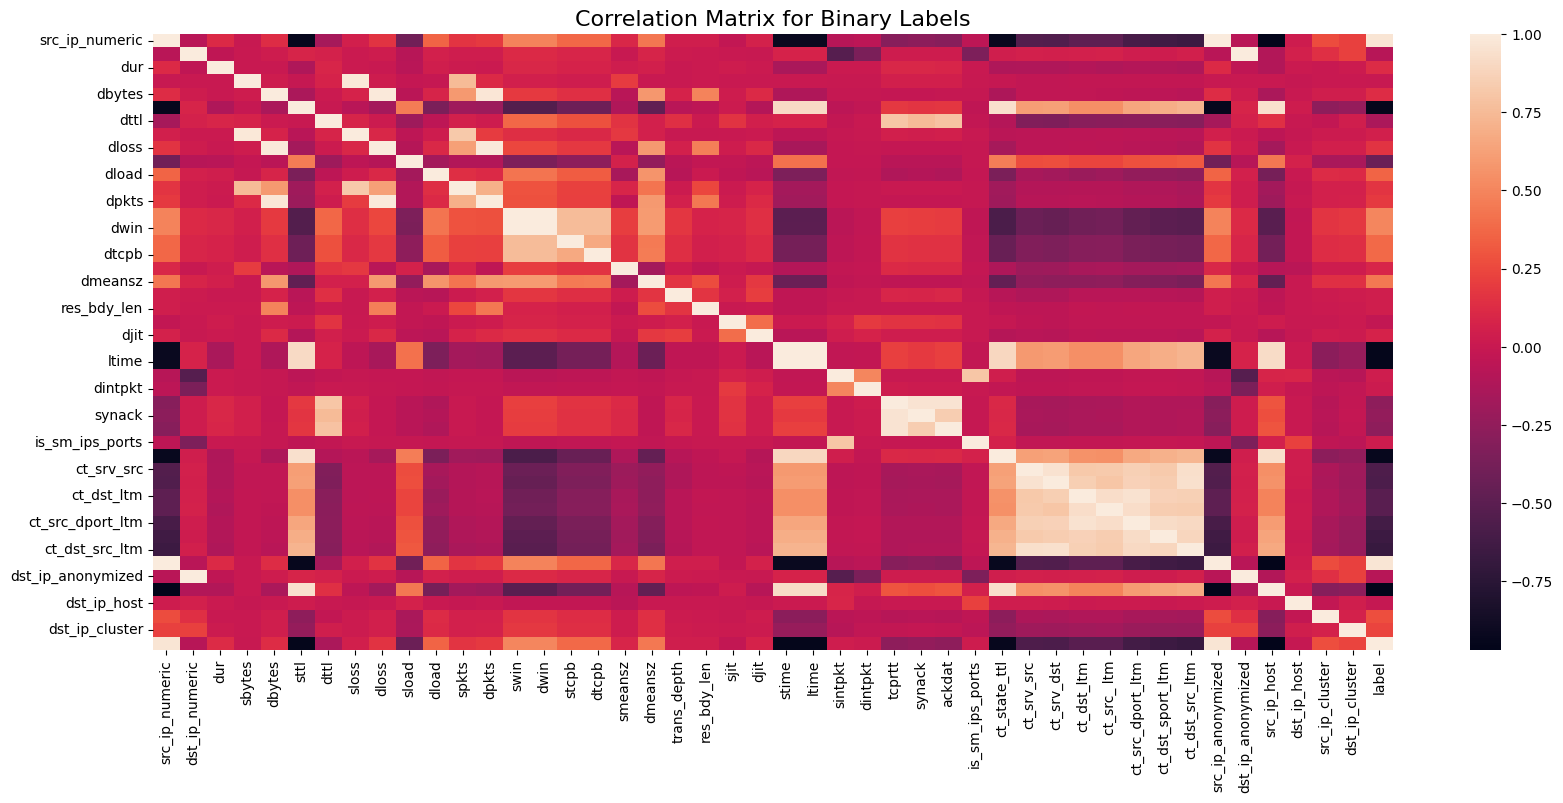

In [96]:
num_col = list(data_df.select_dtypes(include='number').columns)
# num_col.remove('id')
num_col.remove('label')
print(num_col)

data_df.head()

# # calling normalization() function
# data_df = normalization(data_df.copy(),num_col)

data_df.head()

num_col.append('label')

bin_label = pd.DataFrame(data_df.label.map(lambda x:'normal' if x==0 else 'abnormal'))
bin_data = data_df.copy()
bin_data['label'] = bin_label

le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

le1.classes_

plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.show()

In [90]:
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
highest_corr_bin.sort_values(ascending=True)


dload                0.360791
stcpb                0.379982
dtcpb                0.380295
sload                0.424631
dmeansz              0.443474
dwin                 0.500450
swin                 0.501522
ct_src_ ltm          0.508745
ct_dst_ltm           0.511710
ct_srv_src           0.563857
ct_srv_dst           0.573594
ct_src_dport_ltm     0.620878
ct_dst_sport_ltm     0.660275
ct_dst_src_ltm       0.684330
src_ip_anonymized    0.718328
src_ip_numeric       0.718328
ct_state_ttl         0.931165
ltime                0.948891
stime                0.948891
sttl                 0.949574
src_ip_host          0.969061
label                1.000000
Name: label, dtype: float64

In [73]:

bin_cols = highest_corr_bin.index
bin_cols
bin_cols.drop('src_ip_numeric')


Index(['sttl', 'sload', 'dload', 'swin', 'dwin', 'stcpb', 'dtcpb', 'dmeansz',
       'stime', 'ltime', 'ct_state_ttl', 'ct_srv_src', 'ct_srv_dst',
       'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'src_ip_anonymized', 'src_ip_host', 'dst_ip_cluster',
       'label'],
      dtype='object')

In [74]:
bin_data = bin_data[bin_cols].copy()
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']
X


,src_ip_numeric,sttl,sload,dload,swin,dwin,stcpb,dtcpb,dmeansz,stime,...,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,src_ip_anonymized,src_ip_host,dst_ip_cluster
0,3638210563,254,1.386667e+08,0.000000e+00,0,0,0,0,0,1421927663,...,1,1,1,1,1,1,1,3638210563,45059,10
1,3638210561,62,2.805042e+04,8.157942e+05,255,255,1708297952,1939490744,1065,1421927663,...,3,2,2,1,1,1,1,3638210562,45057,14
2,3638210560,254,4.233619e+03,7.496685e+02,255,255,3897219059,2466816006,45,1421927663,...,5,2,2,1,1,1,1,3638210560,45056,14
3,3638210561,254,3.463668e+05,1.022889e+04,255,255,2505143795,3592239707,45,1421927663,...,1,1,1,1,1,1,1,3638210562,45057,14
4,3638210561,254,3.189927e+04,9.401889e+03,255,255,3006332195,1452987536,45,1421927663,...,3,1,1,1,1,1,1,3638210562,45057,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999064,3507748872,31,1.047932e+05,6.436736e+05,255,255,3208686479,3225486168,234,1421955576,...,8,20,7,5,1,1,4,3507748872,8,19
999065,3507748864,31,1.103783e+05,6.195098e+06,255,255,283296697,2429736754,1458,1421955576,...,1,1,2,7,2,2,2,3507748864,0,15
999066,3507748864,31,2.328644e+06,2.658413e+06,255,255,703293844,2848960529,103,1421955576,...,13,13,6,7,2,1,2,3507748864,0,18
999067,3507748870,31,7.684329e+05,4.112740e+05,0,0,0,0,76,1421955576,...,10,13,6,5,1,1,3,3507748870,6,18


In [75]:
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

X

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

knn_bin=KNeighborsClassifier(n_neighbors=5)
knn_bin.fit(X_train,y_train)



y_pred = knn_bin.predict(X_test)

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)



Mean Absolute Error -  0.004829491427027135
Mean Squared Error -  0.004829491427027135
Root Mean Squared Error -  0.06949454242620161
R2 Score -  97.78877085728446
Accuracy -  99.51705085729728


In [1004]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.99      1.00      0.99     64082
      normal       1.00      0.99      1.00    135732

    accuracy                           1.00    199814
   macro avg       0.99      1.00      0.99    199814
weighted avg       1.00      1.00      1.00    199814

